# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### The Business Problem
For dealerships to determine the vehicles features, that drive used car prices.  

We use a dataset of used car features and prices.  To analyze and create a model.  To determine the predictive features for used car prices.  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Data Exploration
What columns are available?  What data is missing?  What data is inaccurate?  What data is irrelevant?


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge

from sklearn.feature_selection import SequentialFeatureSelector

import category_encoders as ce
import sklearn

import warnings
warnings.filterwarnings("ignore", message="Ill-conditioned matrix")


In [13]:
# Get the data
data = pd.read_csv("data/vehicles.csv")

In [3]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
data.head(5)
data.tail(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
#Check for Missing Values
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64


In [6]:
# What are the kinds of data in each column.
for col in data.columns:
    print(data[col].value_counts())
    print("")

id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Remove Duplicates

In [7]:
# Remove duplicates, if any.
print("Before removing duplicates:", data.shape)

data = data.drop_duplicates()
print("After removing duplicates:", data.shape)


Before removing duplicates: (426880, 18)
After removing duplicates: (426880, 18)


#### Drop bad data

In [14]:
# drop bad data - only clean_title, for more accurate analysis
data = data.query("title_status == 'clean'")

# drop - salvage vehicles
data = data.query("condition != 'salvage' & condition != 'new'")

# drop - inaccurate mileage - vehicles with mileage less than 5 miles or null, that are not new.  
rows_to_drop = data[
    ((data['odometer'] < 5) | (data['odometer'].isnull())) & (data['condition'] != 'new')
].index

# Drop them:
data = data.drop(rows_to_drop)

# drop - pricing < $2,000 and more than $100,000
rows_to_drop = data[
    ((data['price'] < 2_000) | (data['price'].isnull()) | (data['price'] > 100_000))
].index

# Drop them:
data = data.drop(rows_to_drop)

# drop cylinder 'types' with few records... 1,712 or less for each of these
rows_to_drop = data[
    ((data['cylinders'] == '5 cylinders') | (data['cylinders'] == '10 cylinders') | (data['cylinders'] == 'other') | (data['cylinders'] == '3 cylinders') | (data['cylinders'] == '12 cylinders'))
].index

# Drop them:
data = data.drop(rows_to_drop)

# drop fuel 'types' with few records... 6K total of these.
rows_to_drop = data[
    ((data['fuel'] == 'hybrid') | (data['fuel'] == 'electric') )
].index

# Drop them:
data = data.drop(rows_to_drop)

# drop all vehicles without a valid price.
data = data.query("price > 1")

# drop all vehicles without a valid year
data = data.query("year.notna()")

# drop the ones without 'manufacturer', only 17K of these.  less than 10%.
data = data.query("manufacturer.notna()")

# drop the onew without 'model', only 3,321 of these
data = data.query("model.notna()")

# drop the ones with transmission/fuel that are null.  less than 1%
data = data.query("transmission.notna()")
data = data.query("fuel.notna()")

# drop the vehicles - that are type of 'other', 'bus', 'offroad' - small subset of the data
data = data.query("type != 'bus' and type != 'offroad' and type != 'other'")


#### Clean the data

In [15]:
# clean the data
data["type"] = data["type"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)
data["paint_color"] = data["paint_color"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)
data["drive"] = data["drive"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)
data["condition"] = data["condition"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)
data["cylinders"] = data["cylinders"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)
data["size"] = data["size"].apply(
    lambda x: "unknown" if (pd.isnull(x) or x == "null") else x
)


#### Drop Irrelevant Columns

In [16]:
# drop irrelevant columns.  VIN and id irrelevant.  paint_color irrrelevant. model not enough detail, only 'clean' title_status records in data, remove column
# drop unnecessary columns
data = data.drop(['VIN', 'id', 'title_status', 'paint_color', 'state'] , axis = 1)


#### Convert the Data Types

In [17]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302844 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        302844 non-null  string
 1   price         302844 non-null  Int64 
 2   year          302844 non-null  Int64 
 3   manufacturer  302844 non-null  string
 4   model         302844 non-null  string
 5   condition     302844 non-null  string
 6   cylinders     302844 non-null  string
 7   fuel          302844 non-null  string
 8   odometer      302844 non-null  Int64 
 9   transmission  302844 non-null  string
 10  drive         302844 non-null  string
 11  size          302844 non-null  string
 12  type          302844 non-null  string
dtypes: Int64(3), string(10)
memory usage: 33.2 MB


In [18]:
## Verification of above Data Manipulation 
# Missing Counts - Print 
missing_counts = data.isnull().sum().sort_values()
print(missing_counts) 

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64


In [19]:
data.describe(include = ['string'])

,region,manufacturer,model,condition,cylinders,fuel,transmission,drive,size,type
count,302844,302844,302844,302844,302844,302844,302844,302844,302844,302844
unique,404,41,18075,5,4,3,3,4,5,11
top,columbus,ford,f-150,unknown,unknown,gas,automatic,4wd,unknown,unknown
freq,2636,54059,6384,117373,123962,261409,240744,98800,215486,65777


#### Correlations, using clean data

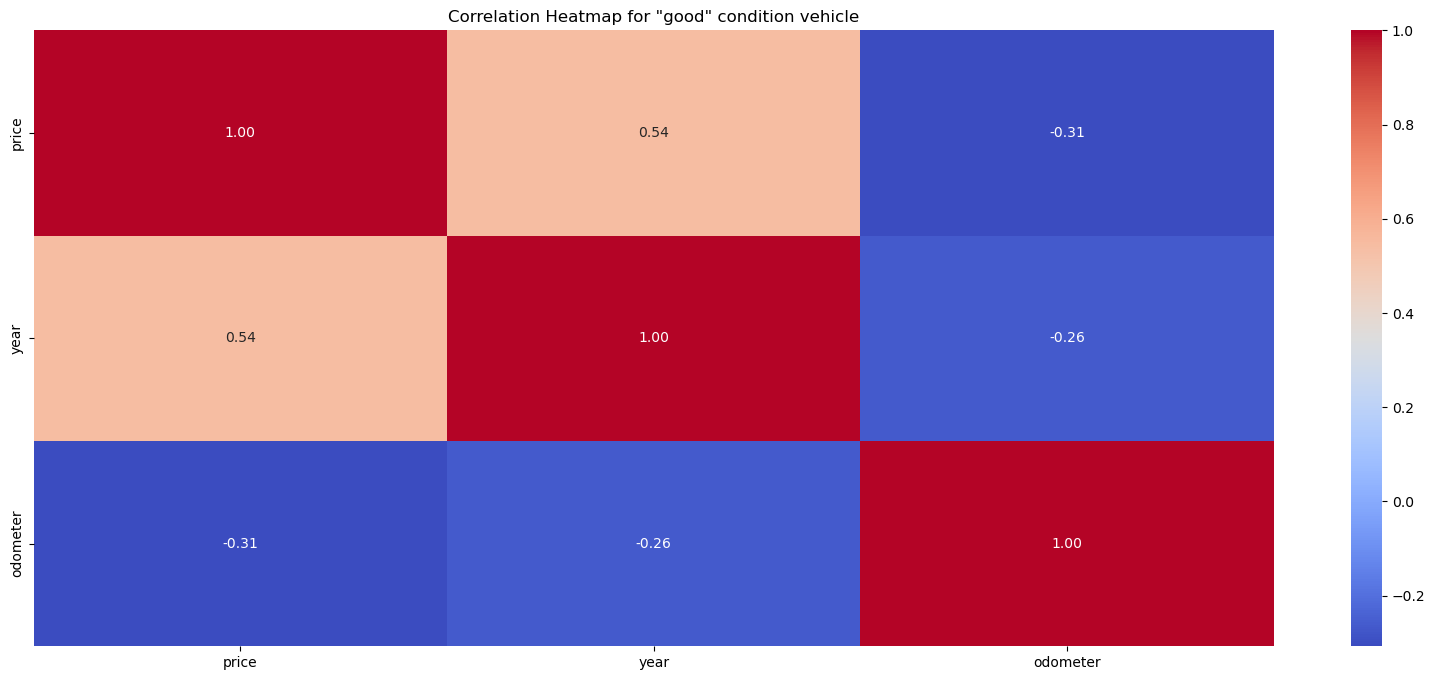

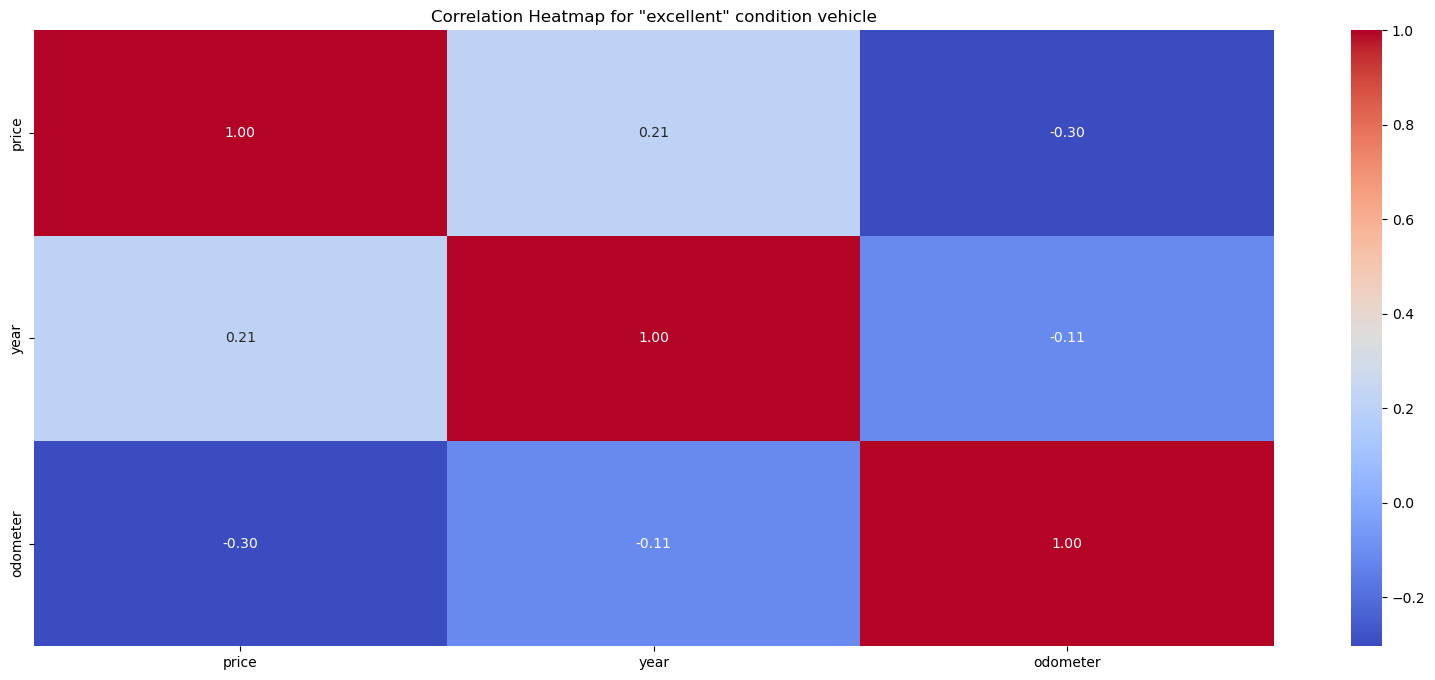

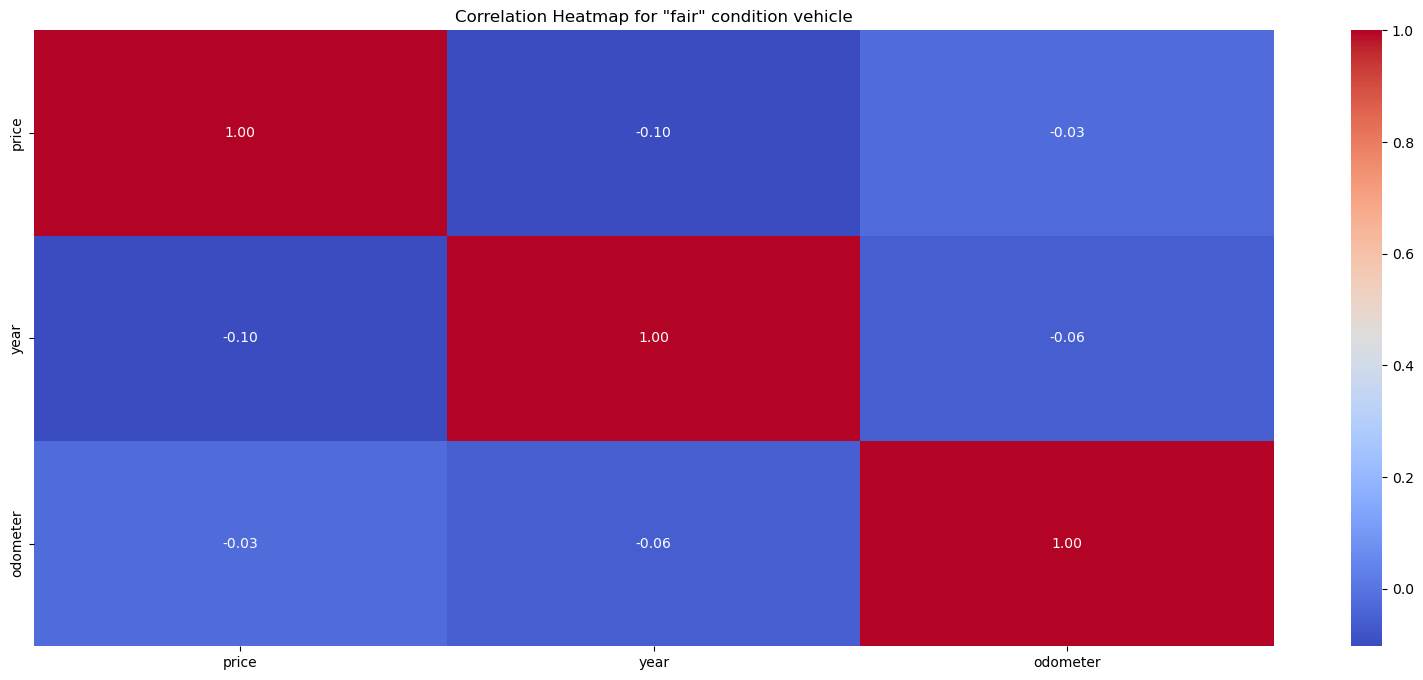

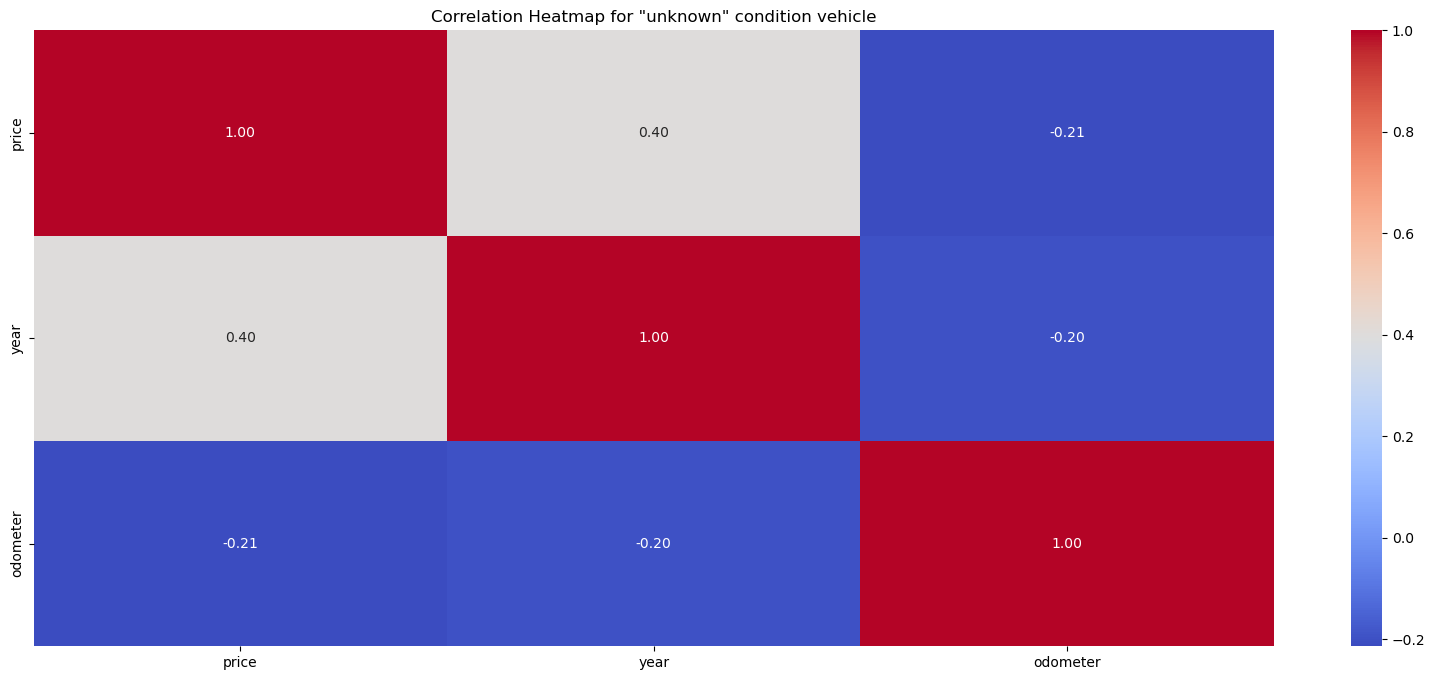

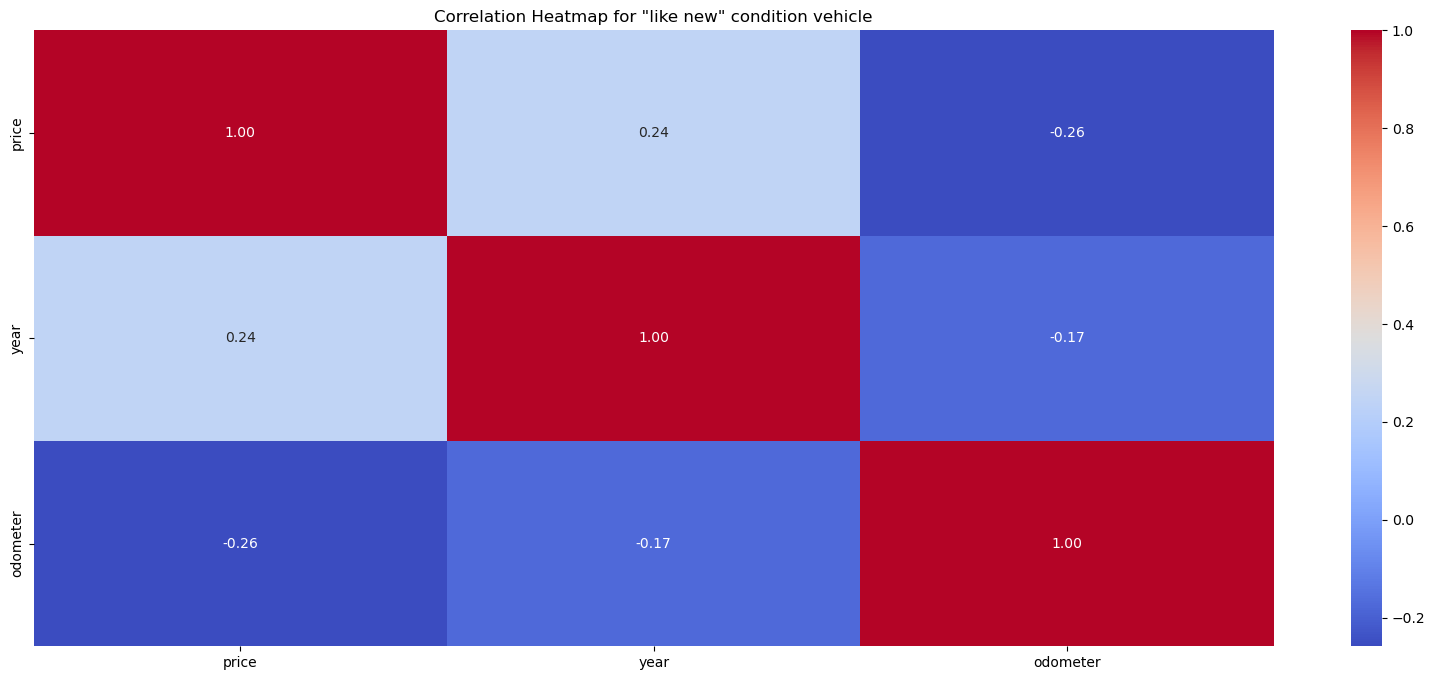

In [20]:
# Loop through each class to plot a heatmap of correlation matrix
condition_types = data['condition'].unique()
for condition in condition_types:
    # Filter the DataFrame for the current class
    subset_df = data[data['condition'] == condition]
    numerical_subset_df = subset_df.select_dtypes(include=['int64', 'float64'])
    corr = numerical_subset_df.corr()

    plt.figure(figsize=(20, 8))  # Adjust the size as needed
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for "{condition}" condition vehicle')
    plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [21]:
# Define features (X) and target variable (y)
#X = data.drop(columns=['price'])  # features to train against
X = data.drop(['price'], axis=1)
y = data['price']  # target variable

In [22]:
# Divide the dataset into train/test (20% into test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"Training set size: {X_train.shape}. Number of labels in the training set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Training set size: (242275, 12). Number of labels in the training set: (242275,)
Test set size: (60569, 12). Number of labels in the test set: (60569,)


In [24]:
#X_train
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302844 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        302844 non-null  string
 1   year          302844 non-null  Int64 
 2   manufacturer  302844 non-null  string
 3   model         302844 non-null  string
 4   condition     302844 non-null  string
 5   cylinders     302844 non-null  string
 6   fuel          302844 non-null  string
 7   odometer      302844 non-null  Int64 
 8   transmission  302844 non-null  string
 9   drive         302844 non-null  string
 10  size          302844 non-null  string
 11  type          302844 non-null  string
dtypes: Int64(2), string(10)
memory usage: 30.6 MB


In [25]:
# Define numerical and categorical features

# this is going to be a james-stein encoder... 
expanded_columns = ['manufacturer', 'region', 'model']
categorical_columns = ['cylinders','fuel','transmission','drive','size','type']
numerical_columns = ['year', 'odometer']
condition_column = ['condition']

In [26]:
expanded_encoder = ce.james_stein.JamesSteinEncoder()

# Create a preprocessor that applies both one-hot encoding for categorical variables and scaling for numerical variables, and an ordinal for condition (hiearchy of quality)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree = 3, include_bias= False), numerical_columns),  # Standarize numerical features
        ('expanded',  expanded_encoder, expanded_columns),
        ('cat', OneHotEncoder(drop = 'if_binary', handle_unknown = 'ignore'), categorical_columns),  # One-Hot encoding for categorical features
        ('condition', OrdinalEncoder(categories=[['unknown', 'fair', 'good', 'excellent', 'like new', 'new']]), condition_column)
    ], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train, y_train)


In [28]:
X_test_processed = preprocessor.transform(X_test)

# Get the polynomial feature names
name_numerical_columns = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_columns)

name_expanded_columns = preprocessor.named_transformers_['expanded'].get_feature_names_out(expanded_columns)

# Get the one-hot encoded feature names
name_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Now use only these feature names to construct your DataFrame:
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()

column_names = np.append(name_numerical_columns,name_expanded_columns)
column_names = np.append(column_names, name_categorical_columns)
column_names = np.append(column_names, condition_column)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=column_names)

if hasattr(X_test_processed, "toarray"):
    X_test_processed = X_test_processed.toarray()

X_test_processed_df = pd.DataFrame(X_test_processed, columns=column_names)


#### Linear Regression Model

In [30]:
# linear regression model

model = LinearRegression()
model.fit(X_train_processed_df, y_train)

y_pred = model.predict(X_test_processed_df)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse}')


Linear Regression RMSE: 8356.0324678536


#### Linear Plot of Predicted vs Actual Price

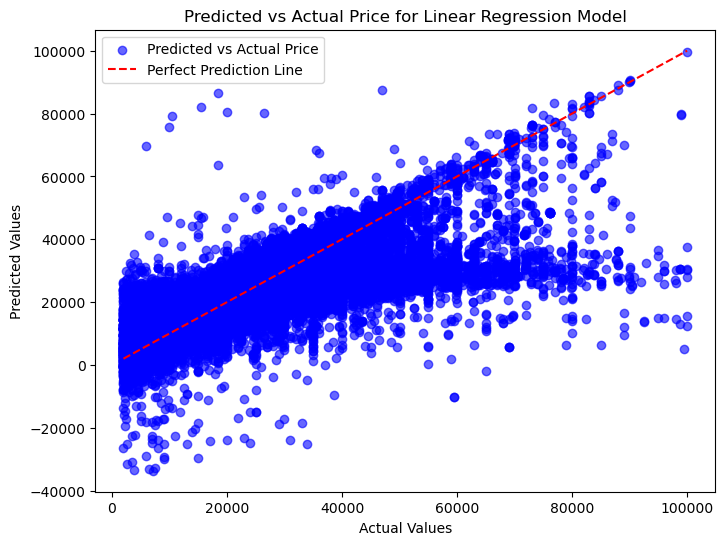

In [40]:
# Plotting Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual Price')

# Add a reference line y = x for ideal prediction comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Price for Linear Regression Model')

# Add a legend
plt.legend()

# Show the plot
plt.show()


#### Ridge Model

In [37]:
# do a grid search with Ridge()
params_dict = {'alpha': [0.01, 0.1, 1.0, 10.0, 20.0, 30.0, 100.0]}

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid=params_dict)

grid.fit(X_train_processed_df, y_train)
train_preds = grid.predict(X_train_processed_df)
test_preds = grid.predict(X_test_processed_df)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Answer check
print(f'Ridge Train MSE: {train_mse}')
print(f'Ridge Test MSE: {test_mse}')

rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'Ridge RMSE: {rmse}')

best_alpha = grid.best_params_

# Answer check
print(f'Best alpha: {list(best_alpha.values())[0]}')

Ridge Train MSE: 41337269.26525036
Ridge Test MSE: 45288909.26812683
Ridge RMSE: 6729.703505216767
Best alpha: 0.01


#### Ridge Plot of Predicted Price vs Actual Price

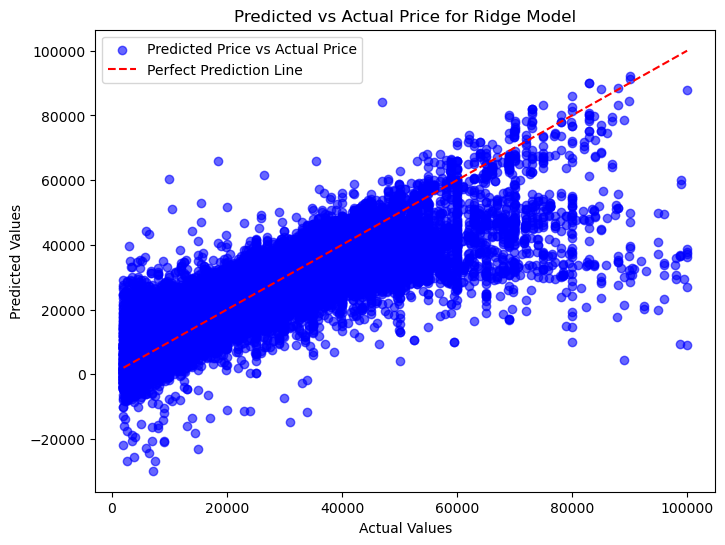

In [41]:
# Plotting Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, color='blue', alpha=0.6, label='Predicted Price vs Actual Price')

# Add a reference line y = x for ideal prediction comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Price for Ridge Model')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### What Characteristics are important for Used Car Prices?

In [39]:
# SFS what is the best characteristics
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=20)
best_features = selector.fit_transform(X_train_processed_df, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())


# ANSWER CHECK
best_features_df.head()


,year,year^2,odometer^2,year^3,year^2 odometer,manufacturer,region,model,cylinders_4 cylinders,cylinders_8 cylinders,fuel_diesel,transmission_other,drive_4wd,size_full-size,type_convertible,type_coupe,type_pickup,type_truck,type_unknown,condition
0,2006.0,4024036.0,48452374161.0,8072216216.0,885766780284.0,20709.945395,18392.591013,6948.441496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2010.0,4040100.0,11449000000.0,8120601000.0,432290700000.0,13479.329516,16206.355105,10511.219373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,2009.0,4036081.0,31930473481.0,8108486729.0,721211349971.0,13817.127997,18040.023202,11939.383088,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,2014.0,4056196.0,23125284900.0,8169178744.0,616825725720.0,20055.120761,22239.499932,20635.968613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2005.0,4020025.0,24336000000.0,8060150125.0,627123900000.0,20055.120761,16291.957017,6334.85886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Conclusions

As we can see here.  

##### The most important characteristics for the Price of a used car is:

    The mileage, year, manufacturer, and the region it is sold in.  

Then the model of vehicle.  And 4 cylinder and 8 cyclinder vehicles are preferred.  Vehicles with diesel, 4 wheel drive and full sized demand the highest prices.  

Followed by convertibles, coupes and then pickups.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The Ridge model had the best accuracy at predicting price within $6,881.07 (Rige Squared Mean Error).

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Conclusions

As we can see above.  

##### The most important characteristics for the Price of a used car is:

    The mileage, year, manufacturer, and the region it is sold in.  

Then the model of vehicle.  And 4 cylinder and 8 cyclinder vehicles are preferred.  Vehicles with diesel, 4 wheel drive and full sized demand the highest prices.  

Followed by convertibles, coupes and then pickups.